In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

### Loading tree and tract population data into geodataframes

In [2]:
# Reading shapefile > TREES geodataframe
input_file = "./output_data/trees.shp"
trees = gpd.read_file(input_file)
trees.head(3)

,most_recen,common_nam,city,condition,geometry
0,8/27/2015,Red maple,New York,fair,POINT (1027431.176 202757.023)
1,9/3/2015,Pin oak,New York,fair,POINT (1034455.726 228645.09)
2,9/5/2015,Honeylocust,New York,good,POINT (1001822.802 200717.113)


In [3]:
# Renaming TREES geodataframe columns
trees.rename(columns={'most_recen': 'most_recent_observation', 'common_nam': 'common_name'}, inplace=True)
trees.head(3)

,most_recent_observation,common_name,city,condition,geometry
0,8/27/2015,Red maple,New York,fair,POINT (1027431.176 202757.023)
1,9/3/2015,Pin oak,New York,fair,POINT (1034455.726 228645.09)
2,9/5/2015,Honeylocust,New York,good,POINT (1001822.802 200717.113)


In [4]:
# Loading TRACT&POPULATION geodataframe from memory
%store -r ny_merge

In [5]:
trp = ny_merge
trp.head(3)

,GEOID,geometry,name,population,state,county,tract
0,36061000100,"MULTIPOLYGON (((972081.369 190736.621, 972184....","Census Tract 1, New York County, New York",0.0,36,061,000100
1,36061000201,"POLYGON ((988547.752 197773.594, 987978.309 19...","Census Tract 2.01, New York County, New York",2761.0,36,061,000201
2,36061000600,"POLYGON ((986960.619 199556.761, 987205.694 19...","Census Tract 6, New York County, New York",10628.0,36,061,000600


In [6]:
# Ensuring both geodataframes are in the local coordinate reference system
print(trees.crs, trp.crs)

EPSG:2263 EPSG:2263


In [7]:
trees.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   most_recent_observation  683788 non-null  object  
 1   common_name              652169 non-null  object  
 2   city                     683788 non-null  object  
 3   condition                652172 non-null  object  
 4   geometry                 683788 non-null  geometry
dtypes: geometry(1), object(4)
memory usage: 26.1+ MB


In [8]:
trp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOID       2325 non-null   object  
 1   geometry    2325 non-null   geometry
 2   name        2325 non-null   object  
 3   population  2325 non-null   float64 
 4   state       2325 non-null   object  
 5   county      2325 non-null   object  
 6   tract       2325 non-null   object  
dtypes: float64(1), geometry(1), object(5)
memory usage: 127.3+ KB


### Overlaying the geodataframes in a single plot

(np.float64(905464.5039847814),
 np.float64(1075092.6570199383),
 np.float64(112495.58803372073),
 np.float64(280483.2301314852))

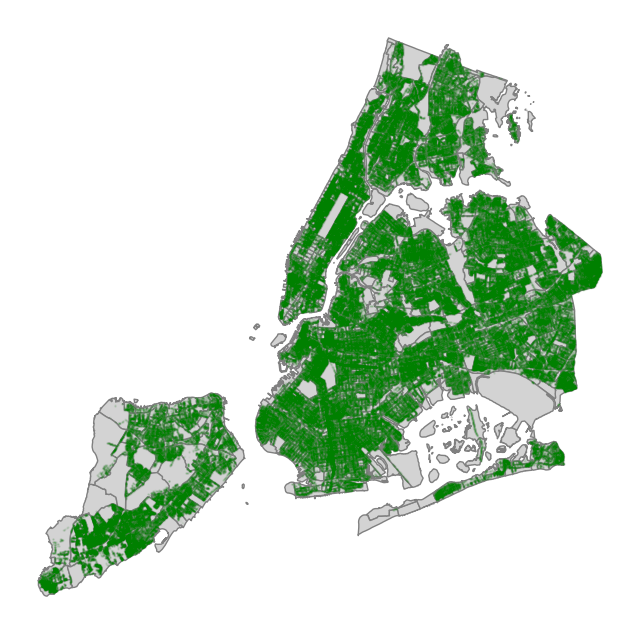

In [9]:
f, ax = plt.subplots(1,1,figsize=(8,8))

# filtered_trp.plot(ax=ax, color = 'lightgrey', edgecolor = 'r')
trp.plot(ax=ax, color = 'lightgrey', edgecolor = 'grey')
trees.plot(ax=ax, color = "green", markersize = 0.5, alpha = 0.025)

ax.axis('off')

### Filtering out trees & tract population data that are not within their spatial join

In [10]:
# Optional step to speed up the process
trp.sindex
trees.sindex

In [11]:
# Spatial Join
joined_df = gpd.sjoin(trees, trp, how="inner", predicate="within")

# Filter the trees GeoDataFrame
f_trees = trees[trees.index.isin(joined_df.index)]

# Filter the trp GeoDataFrame
f_trp = trp[trp.index.isin(joined_df.index_right)]

<Axes: >

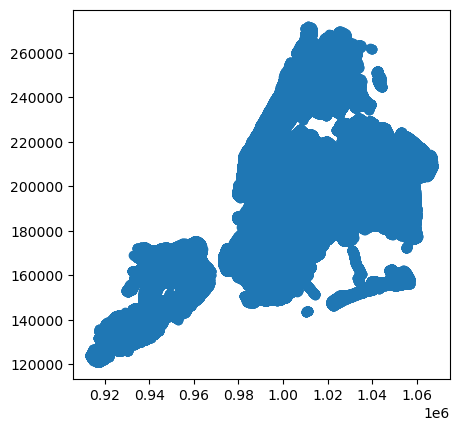

In [12]:
f_trees.plot()

<Axes: >

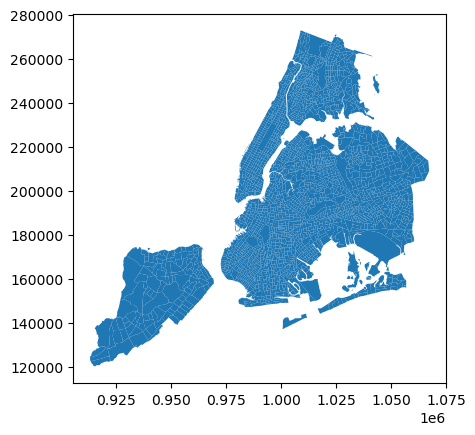

In [13]:
f_trp.plot()

(np.float64(905464.5039847814),
 np.float64(1075092.6570199383),
 np.float64(112495.58803372073),
 np.float64(280483.2301314852))

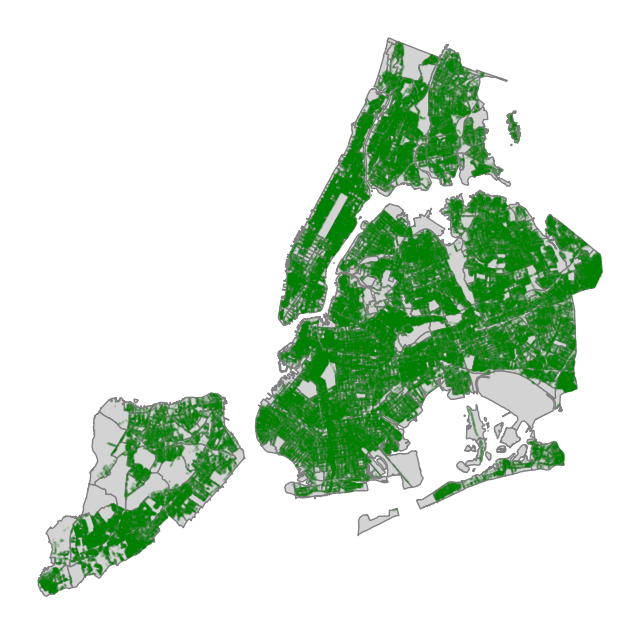

In [14]:
f, ax = plt.subplots(1,1,figsize=(8,8))

f_trp.plot(ax=ax, color = 'lightgrey', edgecolor = 'grey')
f_trees.plot(ax=ax, color = "green", markersize = 0.5, edgecolor = 'g', alpha = 0.025)

ax.axis('off')

In [15]:
trp.count()

GEOID         2325
geometry      2325
name          2325
population    2325
state         2325
county        2325
tract         2325
dtype: int64

In [16]:
f_trp.count()

GEOID         2307
geometry      2307
name          2307
population    2307
state         2307
county        2307
tract         2307
dtype: int64

In [17]:
trees.count()

most_recent_observation    683788
common_name                652169
city                       683788
condition                  652172
geometry                   683788
dtype: int64

In [18]:
f_trees.count()

most_recent_observation    683690
common_name                652072
city                       683690
condition                  652075
geometry                   683690
dtype: int64

In [19]:
f_trp.head(3)

,GEOID,geometry,name,population,state,county,tract
1,36061000201,"POLYGON ((988547.752 197773.594, 987978.309 19...","Census Tract 2.01, New York County, New York",2761.0,36,061,000201
2,36061000600,"POLYGON ((986960.619 199556.761, 987205.694 19...","Census Tract 6, New York County, New York",10628.0,36,061,000600
3,36061001401,"POLYGON ((987474.487 200300.425, 987704.864 20...","Census Tract 14.01, New York County, New York",2999.0,36,061,001401


In [20]:
f_trees.head(3)

,most_recent_observation,common_name,city,condition,geometry
0,8/27/2015,Red maple,New York,fair,POINT (1027431.176 202757.023)
1,9/3/2015,Pin oak,New York,fair,POINT (1034455.726 228645.09)
2,9/5/2015,Honeylocust,New York,good,POINT (1001822.802 200717.113)


### Store filtered geodataframes & sjoin in memory

In [21]:
%store f_trees
%store f_trp
%store joined_df

Stored 'f_trees' (GeoDataFrame)
Stored 'f_trp' (GeoDataFrame)
Stored 'joined_df' (GeoDataFrame)
